# Introduction to Data Analysis in Python

"This survey is the result of a partnership between Axios and Harris Poll to gauge the reputation of the most visible brands in America, based on 20 years of Harris Poll research. From Trader Joe's to Disney, here's how this year's class stacks up.

"Methodology: The Axios Harris Poll 100 is based on a survey of 33,096 Americans in a nationally representative sample conducted March 11-April 3, 2022. The two-step process starts fresh each year by surveying the public’s top-of-mind awareness of companies that either excel or falter in society.

"These 100 “most visible companies” are then ranked by a second group of Americans across the seven key dimensions of reputation to arrive at the ranking. If a company is not on the list, it did not reach a critical level of visibility to be measured."

The data set is currently hosted in the TidyTuesday repository: https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-05-31

In [28]:
import matplotlib.pyplot as plt # to add labels and other customization to plots
import pandas as pd             # treat incoming data as data frames
import seaborn as sns           # modern graphing software

Since we have CSV files (comma-separated values), we can use the `read_csv` function in the `readr` package to load the file into our current programming session.

In [5]:
reputation = pd.read_csv("reputation.csv")
reputation_wide = pd.read_csv("reputation_wide.csv")

# Exploring the Data

One way to take a quick look at the data is with the `head()` method to view the first few rows.

In [3]:
reputation.head()

,company,industry,name,score,rank
0,Trader Joe's,Retail,TRUST,82.7,3
1,Trader Joe's,Retail,ETHICS,82.5,2
2,Trader Joe's,Retail,GROWTH,84.1,2
3,Trader Joe's,Retail,P&S,83.5,9
4,Trader Joe's,Retail,CITIZENSHIP,80.0,3


reputation_wide.head()

For our purposes, we should look at the structure of each data set.  In Pandas, this is processed with the `info()` method.  In particular, this view clarifies which columns are numerical and which are categorical.

In [8]:
reputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   company   700 non-null    object 
 1   industry  700 non-null    object 
 2   name      700 non-null    object 
 3   score     700 non-null    float64
 4   rank      700 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [11]:
reputation_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      100 non-null    object 
 1   industry     100 non-null    object 
 2   trust        100 non-null    float64
 3   ethics       100 non-null    float64
 4   growth       100 non-null    float64
 5   p_s          100 non-null    float64
 6   citizenship  100 non-null    float64
 7   vision       100 non-null    float64
 8   culture      100 non-null    float64
dtypes: float64(7), object(2)
memory usage: 7.2+ KB


# Sample Statistics

To get a sense of the numbers, we can compute sample statistics (such as the mean, median, and standard deviation) for a numerical variable.

In [19]:
reputation.describe(include = 'all')

,company,industry,name,score,rank
count,700,700,700,700.000000,700.000000
unique,100,19,7,NaN,NaN
top,Trader Joe's,Retail,TRUST,NaN,NaN
freq,7,154,100,NaN,NaN
mean,NaN,NaN,NaN,74.819286,50.500000
std,NaN,NaN,NaN,6.003117,28.886711
min,NaN,NaN,NaN,51.200000,1.000000
25%,NaN,NaN,NaN,71.600000,25.750000
50%,NaN,NaN,NaN,75.900000,50.500000
75%,NaN,NaN,NaN,79.100000,75.250000


If we want to focus on a column (or multiple columns), we can use the dot notation in the code

In [17]:
reputation.score.describe()

count    700.000000
mean      74.819286
std        6.003117
min       51.200000
25%       71.600000
50%       75.900000
75%       79.100000
max       84.900000
Name: score, dtype: float64

The Python programming language becomes really useful when we want to perform our tedious calculations across several categories.  Notice how the inclusion of a method in the dot notation below helps us compute the sample statistics for each survey category.

In [16]:
reputation.groupby('name').score.describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
CITIZENSHIP,100.0,71.175,5.253731,53.6,68.550,72.20,74.450,81.0
CULTURE,100.0,74.364,5.961925,53.0,70.750,76.00,78.925,83.1
ETHICS,100.0,74.014,6.048859,51.2,70.750,75.45,78.125,82.7
GROWTH,100.0,76.774,5.692714,55.1,73.675,77.85,81.125,84.9
P&S,100.0,76.341,5.974865,55.7,73.175,78.00,80.625,84.5
TRUST,100.0,74.062,5.958336,52.9,71.625,75.75,78.250,83.7
VISION,100.0,77.005,5.022000,59.4,74.400,78.35,80.500,84.8


In today's exploration, I am interested in the possible differences in the survey scores across the industries.

In [20]:
reputation.groupby('industry').score.describe()

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Airline,14.0,69.321429,5.103570,62.0,64.400,70.10,73.800,76.0
Automotive,49.0,78.144898,2.946471,70.6,76.400,78.30,79.700,83.6
Consumer Goods,28.0,77.342857,2.529738,72.1,75.875,77.75,79.150,81.4
Ecommerce,28.0,70.100000,7.169948,58.1,65.350,69.35,73.250,84.1
Energy,21.0,70.276190,4.260271,61.8,66.600,71.10,72.300,77.1
Financial Services,56.0,74.260714,4.702211,62.1,72.050,74.80,77.700,82.7
Food & Beverage,77.0,75.668831,4.704596,65.7,72.100,75.40,79.900,84.8
Food Delivery,14.0,72.692857,2.439251,67.8,71.000,73.00,74.550,75.9
Groceries,21.0,71.633333,12.629542,51.2,55.700,79.10,80.900,83.1


# Data Visualization

## Histrogram

A histogram allows us to visualize the distribution of one numerical variable.

<AxesSubplot:xlabel='score', ylabel='Count'>

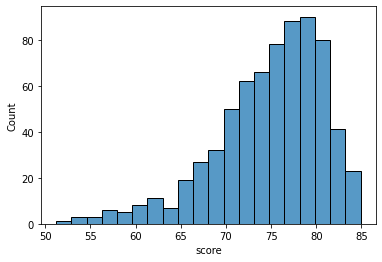

In [45]:
sns.histplot(reputation, x = "score")

## Scatterplot

A scatterplot allows us to visualize a pair of numerical variables.

<AxesSubplot:xlabel='trust', ylabel='culture'>

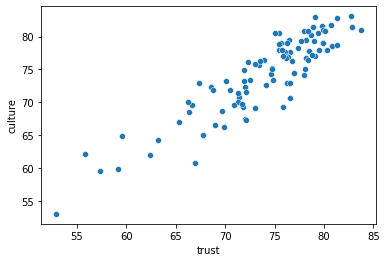

In [42]:
sns.scatterplot(x = 'trust', y = 'culture', data = reputation_wide)

It is a good habit to label your graphs.

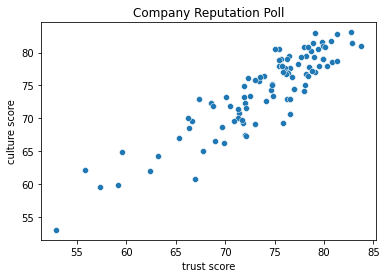

In [41]:
my_plot = sns.scatterplot(x = 'trust', y = 'culture', data = reputation_wide)
my_plot.set(title = "Company Reputation Poll", xlabel = "trust score", ylabel = "culture score")
plt.show(my_plot)

For a scatterplot, we can include the correlation calculation.

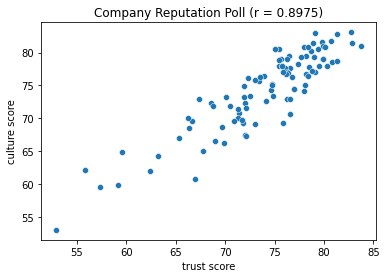

In [40]:
# computing the Pearson correlation between the trust and culture scores
corr_value = reputation_wide.trust.corr(reputation_wide.culture)

my_plot = sns.scatterplot(x = 'trust', y = 'culture', data = reputation_wide)
my_plot.set(title = "Company Reputation Poll (r = " + str(round(corr_value, 4)) + ")", 
            xlabel = "trust score", ylabel = "culture score")
plt.show(my_plot)

## Boxplot

A boxplot allows us to visualize numerical distributions across a categorical variable.

<AxesSubplot:ylabel='score'>

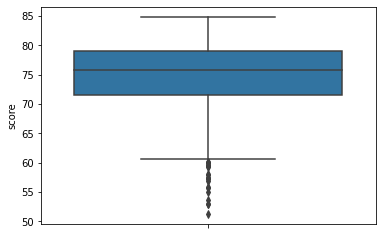

In [39]:
sns.boxplot(y = reputation.score)

<AxesSubplot:xlabel='name', ylabel='score'>

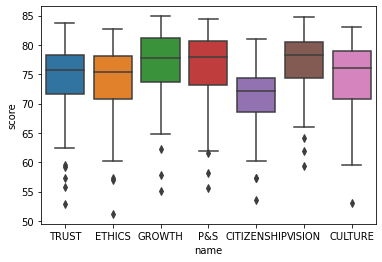

In [46]:
sns.boxplot(x = reputation.name, y = reputation.score)

Let us see what happens if we explore the `industry` categorical variable.

<AxesSubplot:xlabel='industry', ylabel='score'>

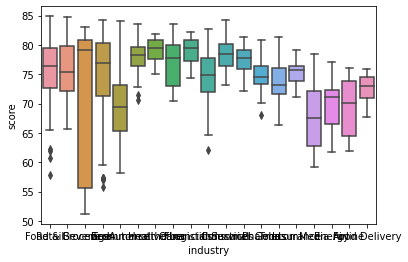

In [47]:
sns.boxplot(x = reputation.industry, y = reputation.score)

To start to ease the complexity, we can (for example) focus on two of the categories

<AxesSubplot:xlabel='industry', ylabel='score'>

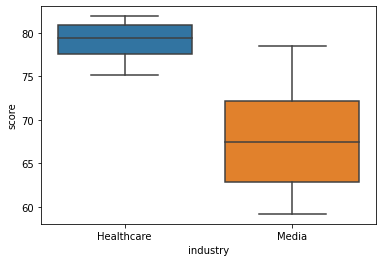

In [53]:
reputation_subset = reputation[reputation.industry.isin(['Healthcare', 'Media'])]

sns.boxplot(x = reputation_subset.industry, y = reputation_subset.score)

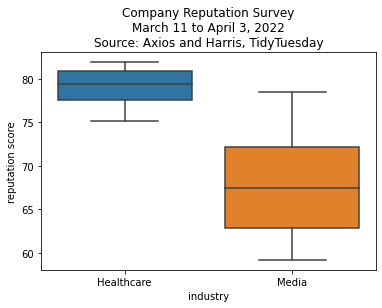

In [55]:
reputation_subset = reputation[reputation.industry.isin(['Healthcare', 'Media'])]

my_plot = sns.boxplot(x = reputation_subset.industry, y = reputation_subset.score)
my_plot.set(title = "Company Reputation Survey\nMarch 11 to April 3, 2022\nSource: Axios and Harris, TidyTuesday",
            xlabel = "industry", ylabel = "reputation score")
plt.show(my_plot)